# MD004 ENTREGA 7 ENTROPÍA


Se dispone del siguiente dataset que contiene características de dos tipos de calabazas. El objetivo será elaborar un modelo de regresión logística que nos permita realizar una predicción sobre si la calabaza es del tipo Urgup_Sivrisi (0) o del tipo Cercevelik (1)

- Area: área de la calabaza
- Perimeter: perímetro de la calabaza
- Major_Axis_Length: Longitud del eje más largo de la calabaza
- Minor_Axis_Length: Longitud del eje más corto de la calabaza
- Convex_Area: Área convexa de la calabaza
- Equiv_Diameter: Diámetro equivalente
- Eccentricity: Excentricidad de la calabaza
- Solidity: Solidez de la calabaza
- Extent: Alcance de la calabaza
- Roundness: Redondez de la calabaza
- Aspect_Ration: Relación de aspecto de la calabaza
- Compactness: Compactibilidad de la calabaza
- Class: Clase de la calabaza


###### Data: 
20240123_Semillas_calabaza.csv'

###### Se pide:

1. Visualización, limpieza y comprensión del dataset (1p): realizar un estudio previo al tratamiento de los datos para comprender mejor la información de la que se dispone
2. Elección de variables:
- Análisis de la información mutua (2p)
- Estudio de la correlación entre las variables (1p)
- Estudio de las componentes principales: no olvidéis las visualizaciones en este apartado (2p)
3. Desarrollo de un modelo de Regresión logística (3p): justificad la elección de variables finales y valoración del modelo en función de la matriz de confusión

Nota: realizad un cambio en la variable clase para establecer como 0 el tipo de calabaza Urgup_Sivrisi y como 1 para el tipo Cercevelik. Recuerda realizar un apartado de conclusiones que recoja las principales observaciones a lo largo del ejercicio

<br> 
<div>
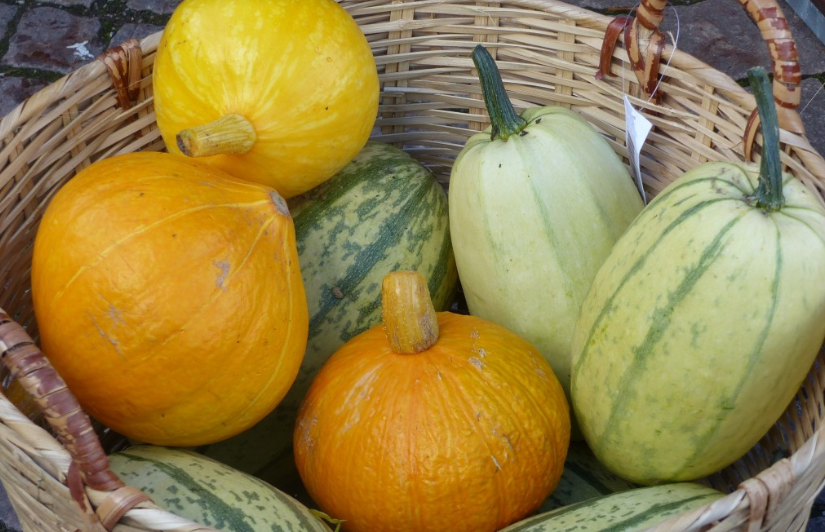
</div>



## <font color='#3d59c6'>  0. CARGA DE PACKAGES </font>

- **tidyverse:** esta librería nos será útil en todo el proceso del análisis descriptivo así como también, a la hora de manipular los datos. Engloba varias librerías como por ejemplo ggplot2 y dplyr (usados en la sesión anterior)
- **FSelectorRcpp:** implementación 'Rcpp' (Weka) de los algoritmos de selección de características basados ​​en entropía 'FSelector' con soporte de matriz dispersa
- **caret:** Nos ayudará a la hora de evaluar un modelo de aprendizaje automático, sobretodo en el proceso de ajuste de hiperparámetros cuando busquemos optimizarlo. Además, contiene funciones para realizar validación cruzada
- **ggplot2**: la usamos para crear gráficos más personalizables o dicho de otra manera, podremos crear visualizaciones complejas.
- **GGally**: es una extensión de ggplot2 con funciones adicionales para crear matrices de gráficos, lo que facilita la exploración de relaciones entre múltiples variables
- **gridExtra:** con esta librería podremos organizar y personalizar nuestros gráficos, así como mapear varios gráficos en una única área

In [160]:
library(tidyverse)
library(caret)
library(ggplot2)
library(GGally)
library(gridExtra)
install.packages("FSelectorRcpp")
library(FSelectorRcpp)
library(dplyr)

Warning message:
"package 'FSelectorRcpp' is in use and will not be installed"


## <font color='#3d59c6'>  1. CARGA DE DATOS </font>

In [161]:
data = read.csv(file='20240123_Semillas_calabaza.csv', header=TRUE, sep=',', dec='.')
head(data)

,X,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,1,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Ã‡erÃ§evelik
2,2,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Ã‡erÃ§evelik
3,3,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Ã‡erÃ§evelik
4,4,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Ã‡erÃ§evelik
5,5,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Ã‡erÃ§evelik
6,6,73191,1041.460,405.8132,231.4261,73969,305.2698,0.8215,0.9895,0.7165,0.8480,1.7535,0.7522,Ã‡erÃ§evelik


In [162]:
dim(data)

[1] 2500   14

Tenemos 2500 registros y 13 variables, excluimos la columna X porque es un listado. 

In [163]:
str(data)

'data.frame':	2500 obs. of  14 variables:
 $ X                : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Area             : int  56276 76631 71623 66458 66107 73191 73338 69692 95727 73465 ...
 $ Perimeter        : num  888 1068 1083 992 998 ...
 $ Major_Axis_Length: num  326 417 436 382 384 ...
 $ Minor_Axis_Length: num  220 234 211 223 220 ...
 $ Convex_Area      : int  56831 77280 72663 67118 67117 73969 73859 70442 96831 74089 ...
 $ Equiv_Diameter   : num  268 312 302 291 290 ...
 $ Eccentricity     : num  0.738 0.828 0.875 0.812 0.819 ...
 $ Solidity         : num  0.99 0.992 0.986 0.99 0.985 ...
 $ Extent           : num  0.745 0.715 0.74 0.74 0.675 ...
 $ Roundness        : num  0.896 0.844 0.767 0.849 0.834 ...
 $ Aspect_Ration    : num  1.48 1.78 2.07 1.71 1.74 ...
 $ Compactness      : num  0.821 0.749 0.693 0.762 0.756 ...
 $ Class            : chr  "Ã‡erÃ§evelik" "Ã‡erÃ§evelik" "Ã‡erÃ§evelik" "Ã‡erÃ§evelik" ...


Hacemos un listado de la variable objetivo, eliminamos los caracteres especiales y asignamos cero a la calabaza del tipo Urgup_Sivrisi y uno a la del tipo Cercevelik.

In [164]:
clase = data$Class
clase

[1] "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"   
   [5] "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"   
   [9] "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"   
  [13] "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"   
  [17] "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"   
  [21] "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"   
  [25] "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"   
  [29] "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"   
  [33] "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"   
  [37] "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"   
  [41] "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"   
  [45] "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"   
  [49] "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"   
  [53] "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"   
  [57] "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"   
  [61] "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"   
  [65] "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"   
  [69] "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"   
  [73] "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"   
  [77] "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"   
  [81] "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"   
  [85] "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"   
  [89] "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"   
  [93] "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"   
  [97] "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"   
 [101] "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"   
 [105] "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"   
 [109] "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"   
 [113] "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"   
 [117] "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"   
 [121] "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"   
 [125] "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"   
 [129] "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"   
 [133] "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"   
 [137] "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"   
 [141] "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"   
 [145] "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"   
 [149] "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"   
 [153] "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"   
 [157] "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"   
 [161] "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"   
 [165] "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"   
 [169] "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"   
 [173] "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"   
 [177] "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"   
 [181] "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"   
 [185] "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"   
 [189] "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"   
 [193] "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"   
 [197] "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"   
 [201] "Ã‡erÃ§evelik"    "Ã‡erÃ§evelik"    "Ã‡erÃ§eve

In [165]:
clase_nueva <- substr(clase, start = 9, stop = nchar(clase))
clase_nueva

[1] "elik"    "elik"    "elik"    "elik"    "elik"    "elik"    "elik"   
   [8] "elik"    "elik"    "elik"    "elik"    "elik"    "elik"    "elik"   
  [15] "elik"    "elik"    "elik"    "elik"    "elik"    "elik"    "elik"   
  [22] "elik"    "elik"    "elik"    "elik"    "elik"    "elik"    "elik"   
  [29] "elik"    "elik"    "elik"    "elik"    "elik"    "elik"    "elik"   
  [36] "elik"    "elik"    "elik"    "elik"    "elik"    "elik"    "elik"   
  [43] "elik"    "elik"    "elik"    "elik"    "elik"    "elik"    "elik"   
  [50] "elik"    "elik"    "elik"    "elik"    "elik"    "elik"    "elik"   
  [57] "elik"    "elik"    "elik"    "elik"    "elik"    "elik"    "elik"   
  [64] "elik"    "elik"    "elik"    "elik"    "elik"    "elik"    "elik"   
  [71] "elik"    "elik"    "elik"    "elik"    "elik"    "elik"    "elik"   
  [78] "elik"    "elik"    "elik"    "elik"    "elik"    "elik"    "elik"   
  [85] "elik"    "elik"    "elik"    "elik"    "elik"    "elik"    "elik"   
  [92] "elik"    "elik"    "elik"    "elik"    "elik"    "elik"    "elik"   
  [99] "elik"    "elik"    "elik"    "elik"    "elik"    "elik"    "elik"   
 [106] "elik"    "elik"    "elik"    "elik"    "elik"    "elik"    "elik"   
 [113] "elik"    "elik"    "elik"    "elik"    "elik"    "elik"    "elik"   
 [120] "elik"    "elik"    "elik"    "elik"    "elik"    "elik"    "elik"   
 [127] "elik"    "elik"    "elik"    "elik"    "elik"    "elik"    "elik"   
 [134] "elik"    "elik"    "elik"    "elik"    "elik"    "elik"    "elik"   
 [141] "elik"    "elik"    "elik"    "elik"    "elik"    "elik"    "elik"   
 [148] "elik"    "elik"    "elik"    "elik"    "elik"    "elik"    "elik"   
 [155] "elik"    "elik"    "elik"    "elik"    "elik"    "elik"    "elik"   
 [162] "elik"    "elik"    "elik"    "elik"    "elik"    "elik"    "elik"   
 [169] "elik"    "elik"    "elik"    "elik"    "elik"    "elik"    "elik"   
 [176] "elik"    "elik"    "elik"    "elik"    "elik"    "elik"    "elik"   
 [183] "elik"    "elik"    "elik"    "elik"    "elik"    "elik"    "elik"   
 [190] "elik"    "elik"    "elik"    "elik"    "elik"    "elik"    "elik"   
 [197] "elik"    "elik"    "elik"    "elik"    "elik"    "elik"    "elik"   
 [204] "elik"    "elik"    "elik"    "elik"    "elik"    "elik"    "elik"   
 [211] "elik"    "elik"    "elik"    "elik"    "elik"    "elik"    "elik"   
 [218] "elik"    "elik"    "elik"    "elik"    "elik"    "elik"    "elik"   
 [225] "elik"    "elik"    "elik"    "elik"    "elik"    "elik"    "elik"   
 [232] "elik"    "elik"    "elik"    "elik"    "elik"    "elik"    "elik"   
 [239] "elik"    "elik"    "elik"    "elik"    "elik"    "elik"    "elik"   
 [246] "elik"    "elik"    "elik"    "elik"    "elik"    "elik"    "elik"   
 [253] "elik"    "elik"    "elik"    "elik"    "elik"    "elik"    "elik"   
 [260] "elik"    "elik"    "elik"    "elik"    "elik"    "elik"    "elik"   
 [267] "elik"    "elik"    "elik"    "elik"    "elik"    "elik"    "elik"   
 [274] "elik"    "elik"    "elik"    "elik"    "elik"    "elik"    "elik"   
 [281] "elik"    "elik"    "elik"    "elik"    "elik"    "elik"    "elik"   
 [288] "elik"    "elik"    "elik"    "elik"    "elik"    "elik"    "elik"   
 [295] "elik"    "elik"    "elik"    "elik"    "elik"    "elik"    "elik"   
 [302] "elik"    "elik"    "elik"    "elik"    "elik"    "elik"    "elik"   
 [309] "elik"    "elik"    "elik"    "elik"    "elik"    "elik"    "elik"   
 [316] "elik"    "elik"    "elik"    "elik"    "elik"    "elik"    "elik"   
 [323] "elik"    "elik"    "elik"    "elik"    "elik"    "elik"    "elik"   
 [330] "elik"    "elik"    "elik"    "elik"    "elik"    "elik"    "elik"   
 [337] "elik"    "elik"    "elik"    "elik"    "elik"    "elik"    "elik"   
 [344] "elik"    "elik"    "elik"    "elik"    "elik"    "elik"    "elik"   
 [351] "elik"    "elik"    "elik"    "elik"    "elik"    "elik"    "elik"   
 [358] "elik"    "elik"    "elik"    "elik"    "elik"    "elik"    "elik"   

In [166]:
clase_nueva <- ifelse(clase_nueva == "elik", 1,
                       ifelse(clase_nueva == "Sivrisi", 0, clase_nueva))
clase_nueva

[1] "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1"
  [19] "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1"
  [37] "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1"
  [55] "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1"
  [73] "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1"
  [91] "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1"
 [109] "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1"
 [127] "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1"
 [145] "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1"
 [163] "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1"
 [181] "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1"
 [199] "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1"
 [217] "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1"
 [235] "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1"
 [253] "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1"
 [271] "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1"
 [289] "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1"
 [307] "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1"
 [325] "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1"
 [343] "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1"
 [361] "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1"
 [379] "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1"
 [397] "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1"
 [415] "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1"
 [433] "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1"
 [451] "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1"
 [469] "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1"
 [487] "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1"
 [505] "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1"
 [523] "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1"
 [541] "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1"
 [559] "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1"
 [577] "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1"
 [595] "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1"
 [613] "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1"
 [631] "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1"
 [649] "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1"
 [667] "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1"
 [685] "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1"
 [703] "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1"
 [721] "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1"
 [739] "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1"
 [757] "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1"
 [775] "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1"
 [793] "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1"
 [811] "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1"
 [829] "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1"
 [847] "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1"
 [865] "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1"
 [883] "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1"
 [901] "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1

In [167]:
clase <- as.numeric(clase_nueva)

In [168]:
data$clase <- clase

Creamos una nueva columna para poder hacer el modelo llamada "clase"

In [169]:
data

X,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class,clase
<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Ã‡erÃ§evelik,1
2,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Ã‡erÃ§evelik,1
3,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Ã‡erÃ§evelik,1
4,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Ã‡erÃ§evelik,1
5,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Ã‡erÃ§evelik,1
6,73191,1041.460,405.8132,231.4261,73969,305.2698,0.8215,0.9895,0.7165,0.8480,1.7535,0.7522,Ã‡erÃ§evelik,1
7,73338,1020.055,392.2516,238.5494,73859,305.5762,0.7938,0.9929,0.7187,0.8857,1.6443,0.7790,Ã‡erÃ§evelik,1
8,69692,1049.108,421.4875,211.7707,70442,297.8836,0.8646,0.9894,0.6736,0.7957,1.9903,0.7067,Ã‡erÃ§evelik,1
9,95727,1231.609,488.1199,251.3086,96831,349.1180,0.8573,0.9886,0.6188,0.7930,1.9423,0.7152,Ã‡erÃ§evelik,1


In [170]:
data <- data[, -which(names(data) == "X")]
data

Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class,clase
<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Ã‡erÃ§evelik,1
76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Ã‡erÃ§evelik,1
71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Ã‡erÃ§evelik,1
66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Ã‡erÃ§evelik,1
66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Ã‡erÃ§evelik,1
73191,1041.460,405.8132,231.4261,73969,305.2698,0.8215,0.9895,0.7165,0.8480,1.7535,0.7522,Ã‡erÃ§evelik,1
73338,1020.055,392.2516,238.5494,73859,305.5762,0.7938,0.9929,0.7187,0.8857,1.6443,0.7790,Ã‡erÃ§evelik,1
69692,1049.108,421.4875,211.7707,70442,297.8836,0.8646,0.9894,0.6736,0.7957,1.9903,0.7067,Ã‡erÃ§evelik,1
95727,1231.609,488.1199,251.3086,96831,349.1180,0.8573,0.9886,0.6188,0.7930,1.9423,0.7152,Ã‡erÃ§evelik,1


# <font color='#3d59c6'>  2. REALIZAR ANÁLISIS DESCRIPTIVO </font>

In [171]:
data_num = data %>%
  select_if(is.numeric)

In [172]:
summary(data_num)

      Area          Perimeter      Major_Axis_Length Minor_Axis_Length
 Min.   : 47939   Min.   : 868.5   Min.   :320.8     Min.   :152.2    
 1st Qu.: 70765   1st Qu.:1048.8   1st Qu.:415.0     1st Qu.:211.2    
 Median : 79076   Median :1123.7   Median :449.5     Median :224.7    
 Mean   : 80658   Mean   :1130.3   Mean   :456.6     Mean   :225.8    
 3rd Qu.: 89758   3rd Qu.:1203.3   3rd Qu.:492.7     3rd Qu.:240.7    
 Max.   :136574   Max.   :1559.5   Max.   :661.9     Max.   :305.8    
  Convex_Area     Equiv_Diameter   Eccentricity       Solidity     
 Min.   : 48366   Min.   :247.1   Min.   :0.4921   Min.   :0.9186  
 1st Qu.: 71512   1st Qu.:300.2   1st Qu.:0.8317   1st Qu.:0.9883  
 Median : 79872   Median :317.3   Median :0.8637   Median :0.9903  
 Mean   : 81508   Mean   :319.3   Mean   :0.8609   Mean   :0.9895  
 3rd Qu.: 90798   3rd Qu.:338.1   3rd Qu.:0.8970   3rd Qu.:0.9915  
 Max.   :138384   Max.   :417.0   Max.   :0.9481   Max.   :0.9944  
     Extent         Roundne

A simple vista vemos que las variables tienen una distribución normal con excepción de "Solidity"

In [173]:
num_nulos <- sum(is.na(data))
num_nulos

[1] 0

No tenemos valores nulos

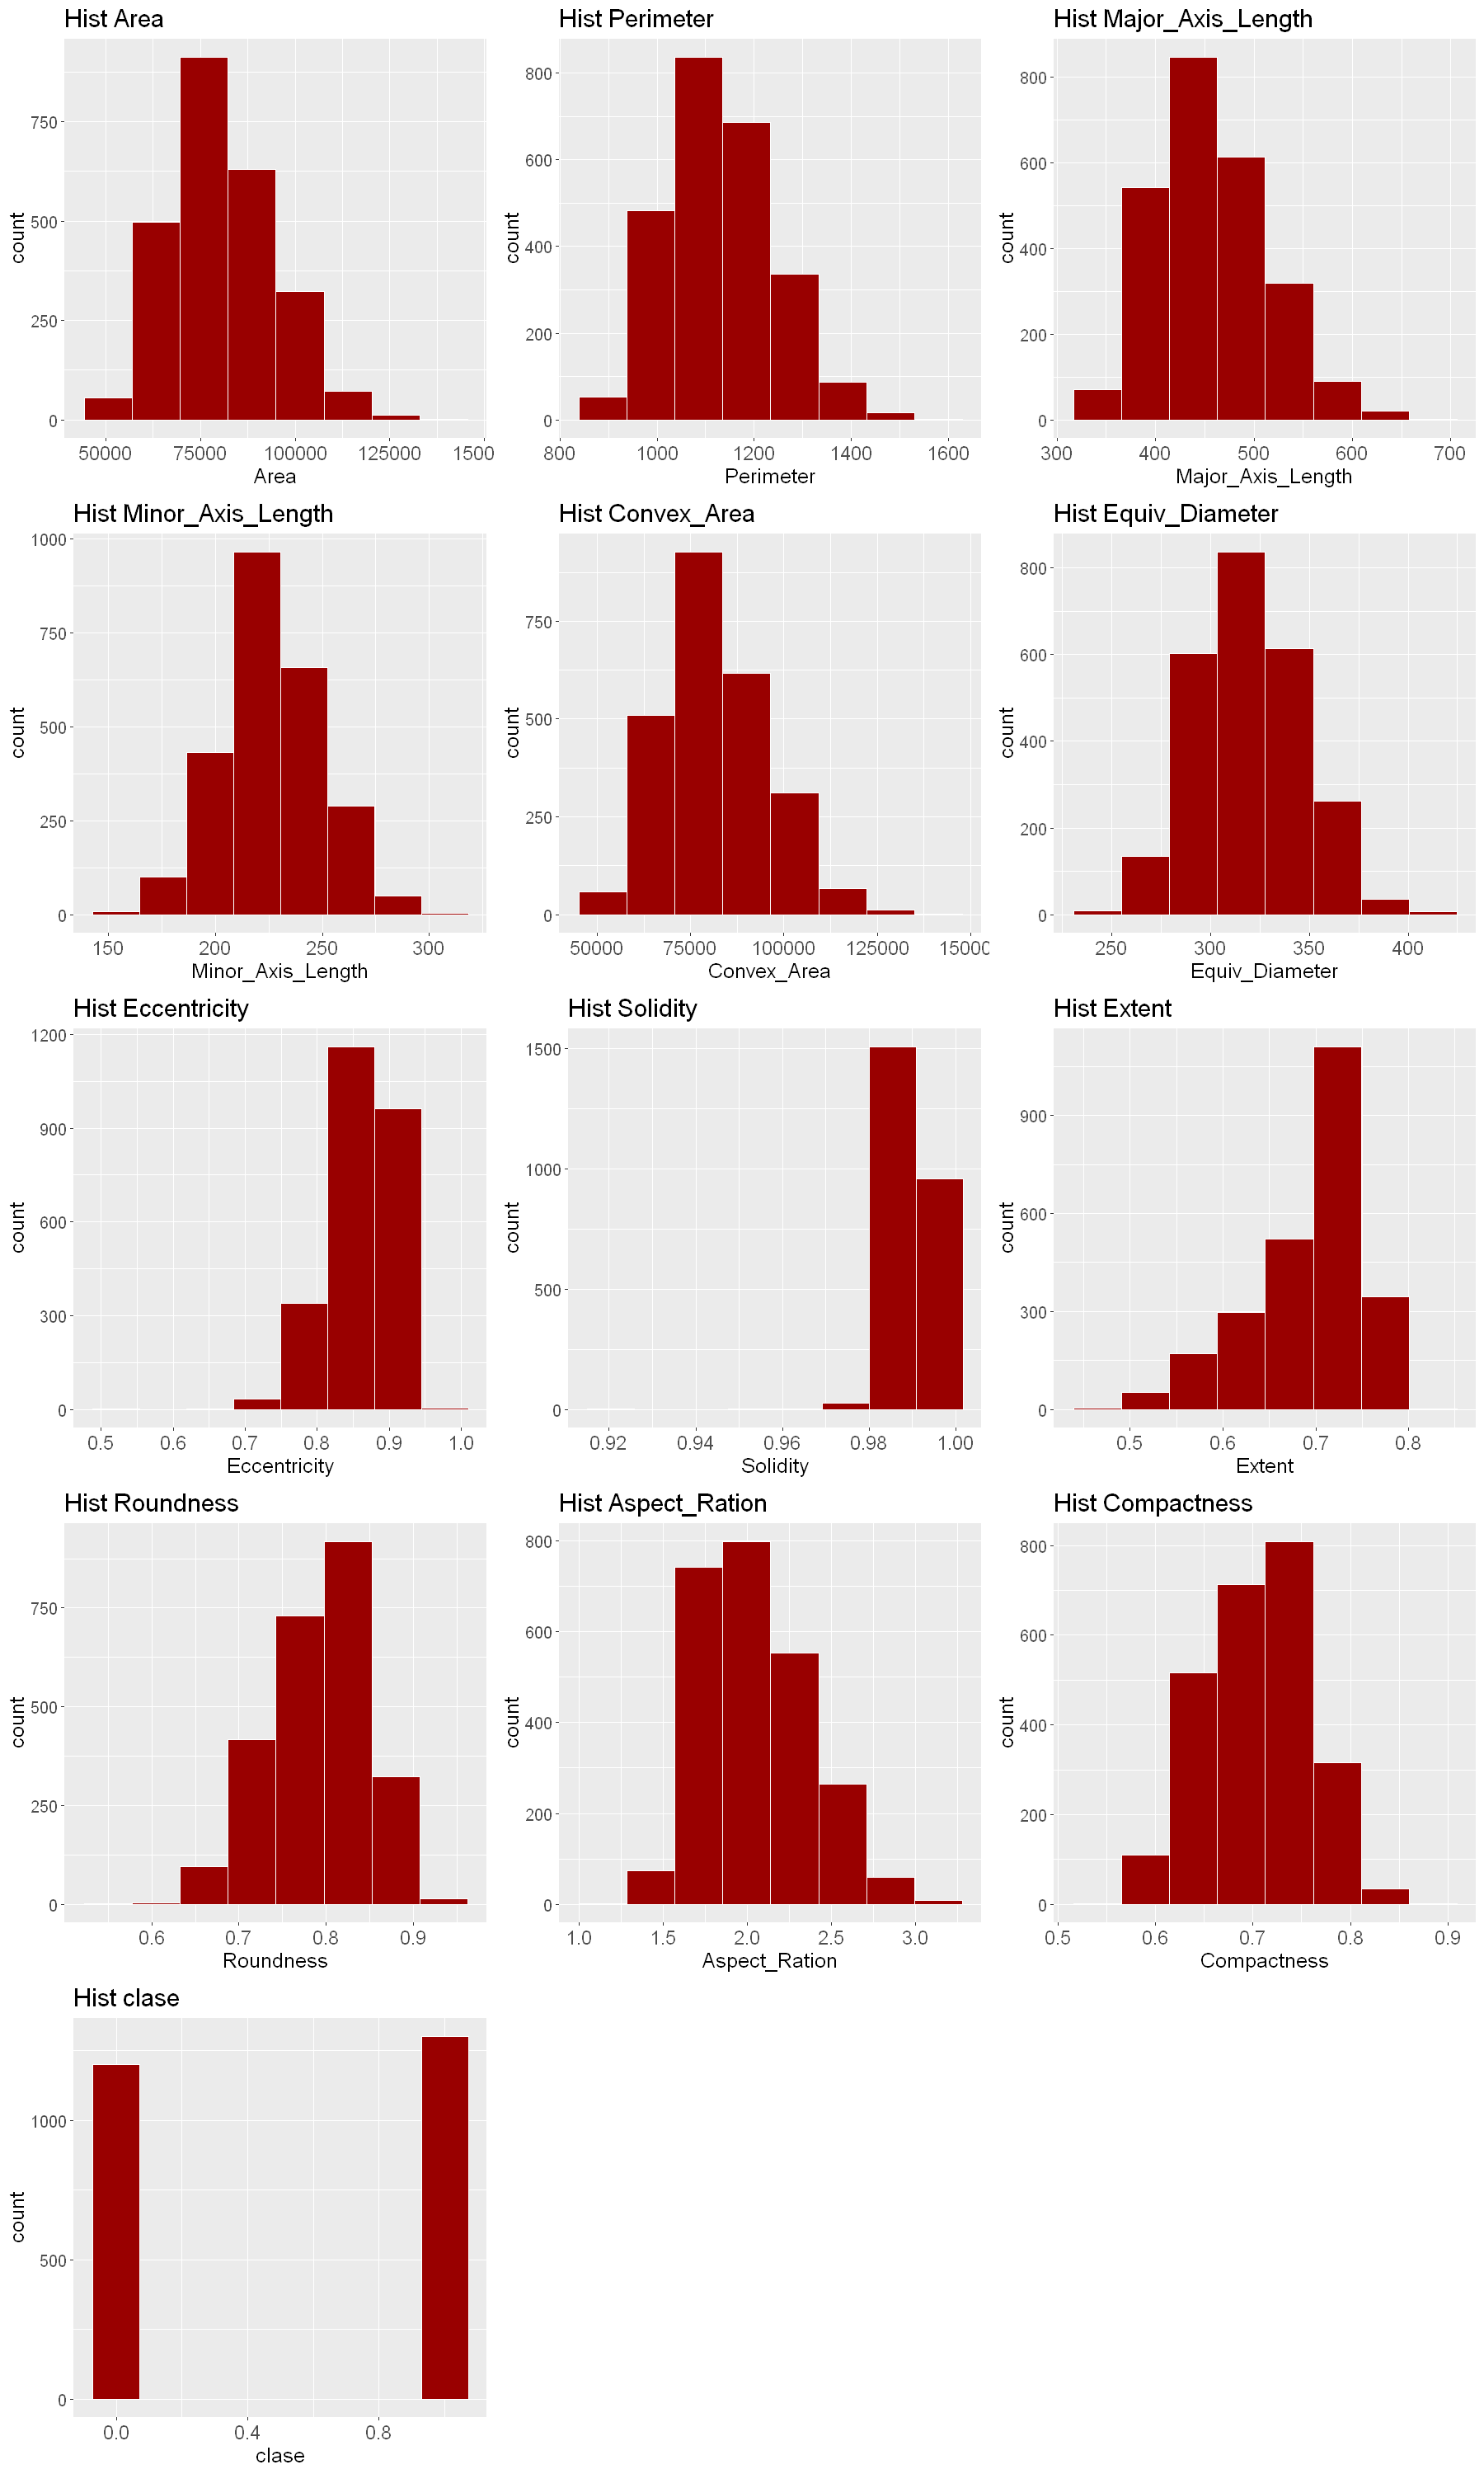

In [174]:
graficos_hist = list()
var_data = colnames(data_num)

for (variable in var_data) {

  grafico = ggplot(data_num) +
    aes_string(x = variable) +
    geom_histogram(bins = 8, fill = '#990000', color = 'white', na.rm = TRUE) +
    theme(text = element_text(size = 15), axis.text.x = element_text(size = 14)) + 
    labs(title = paste('Hist', variable))
  

  graficos_hist[[length(graficos_hist) + 1]] = grafico
}

options(
  repr.plot.width = 15,  
  repr.plot.height = 25  
)

# Mostrar los histogramas en un grid
grid.arrange(grobs = graficos_hist, ncol = 3, widths = rep(2, 3))

In [175]:
# Balance de las clases de la variable clase_nueva
cat("Calabaza del tipo Urgup_Sivrisi", sum(data_num$clase), "\n")
cat("Calabaza del tipo Cercevelik",mean(data_num$clase == 1) * 100, "\n")

Calabaza del tipo Urgup_Sivrisi 1300 
Calabaza del tipo Cercevelik 52 


Observamos el balance entre las clases y se observa una predominancia de la Calabaza del tipo Urgup_Sivrisi

In [176]:
#Generamos datasets filtrando por la clase
data_num_1 = data_num[data_num$clase == 1,]
data_num_0 = data_num[data_num$clase == 0,]

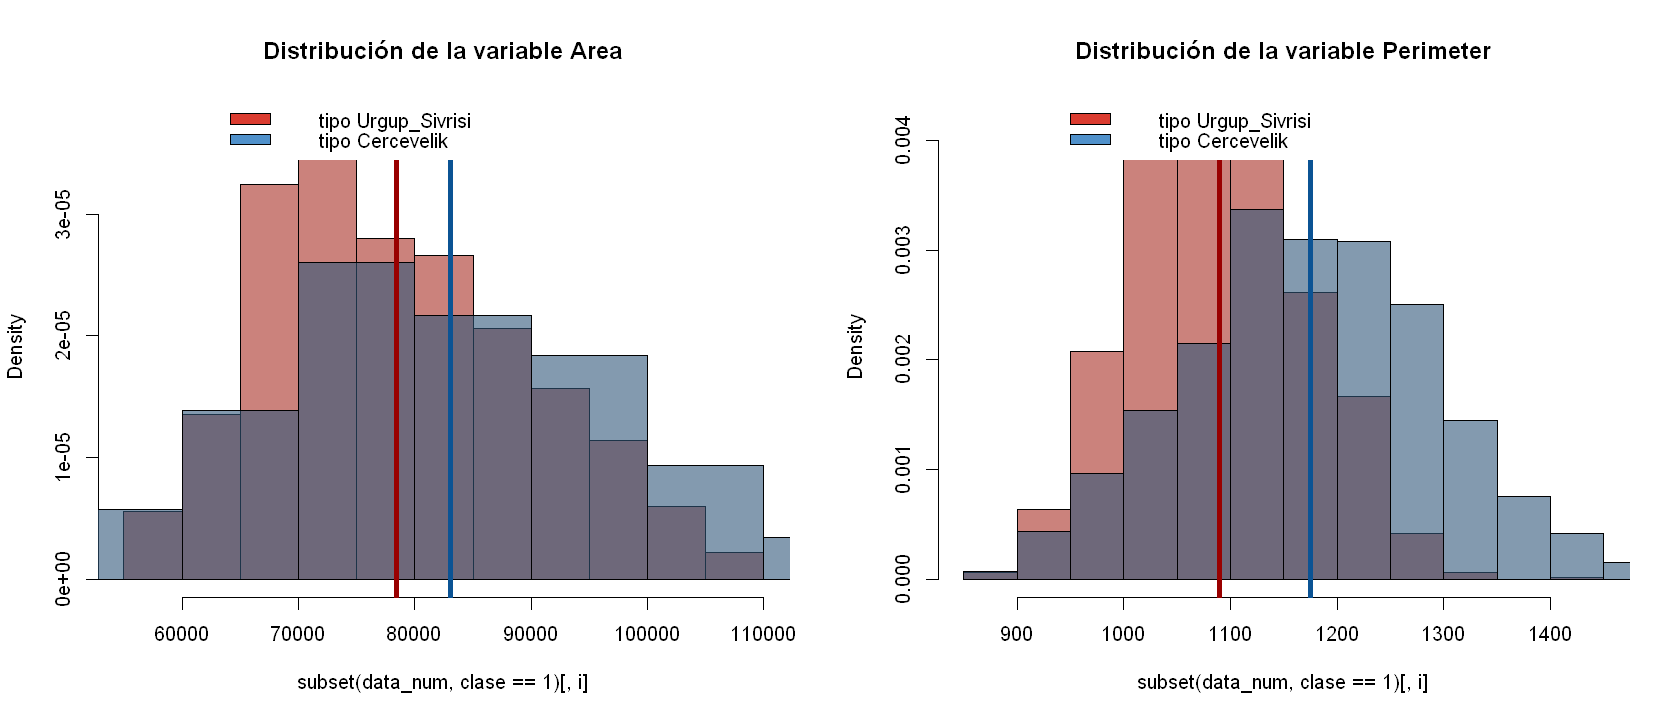

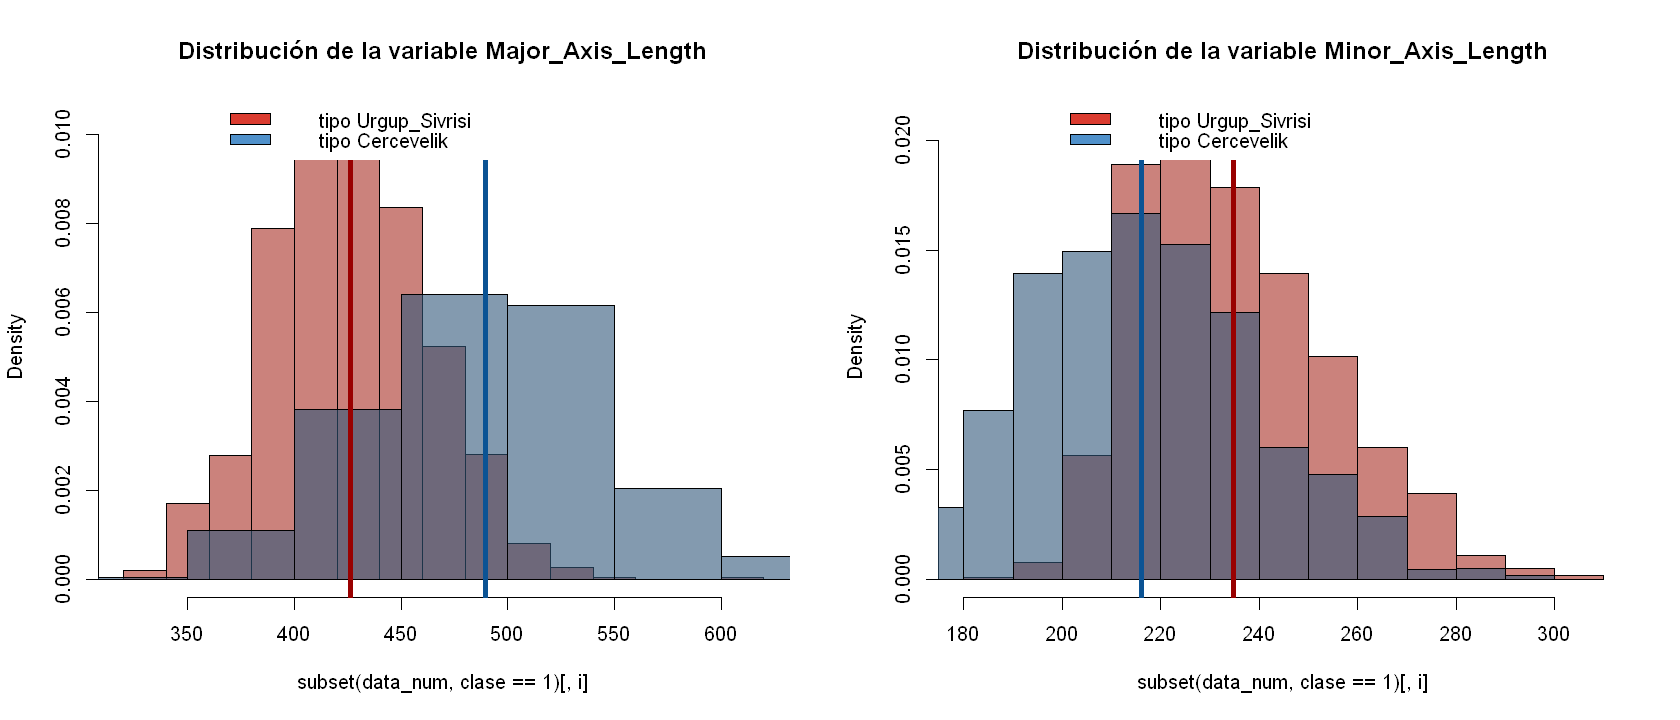

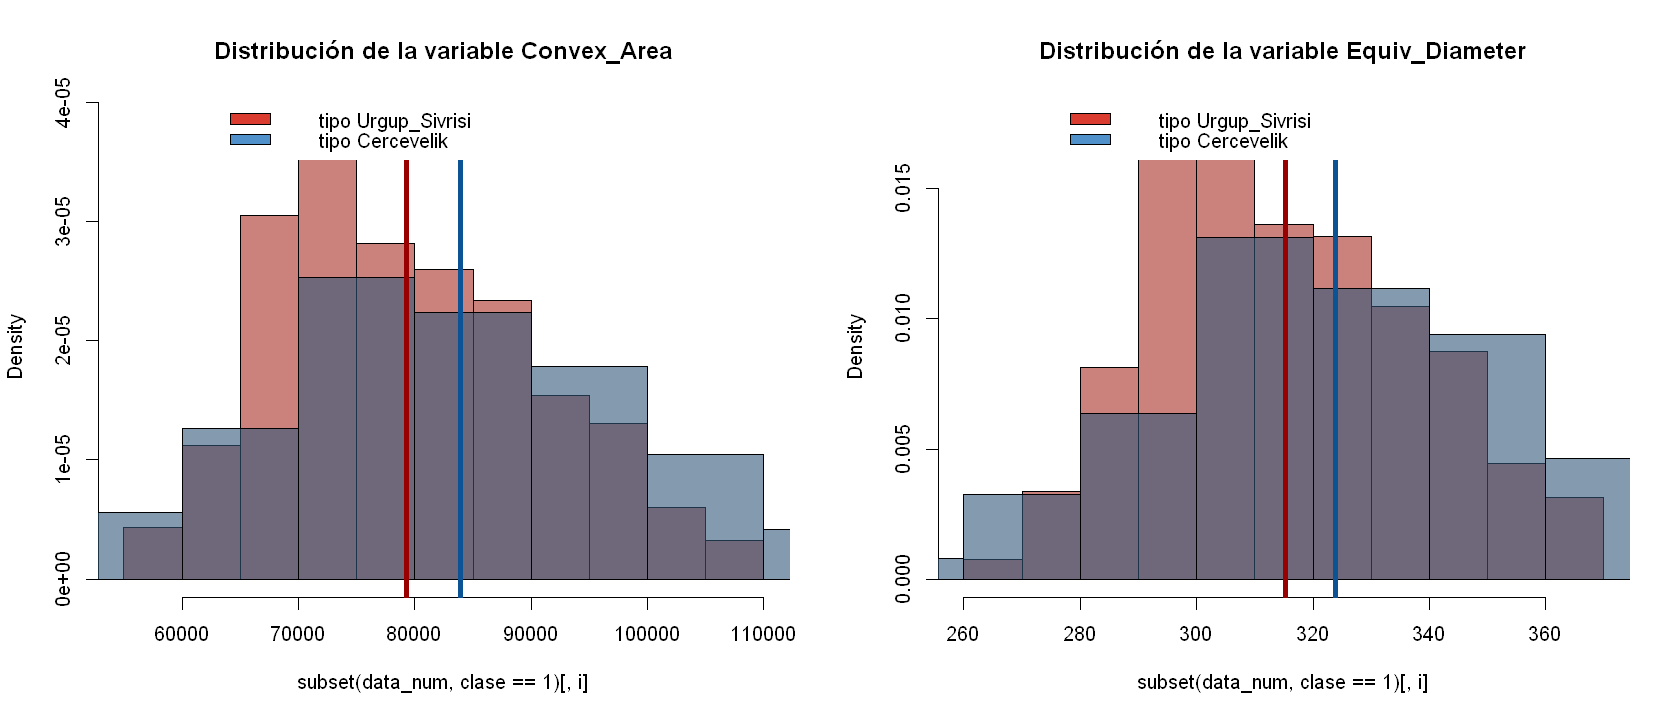

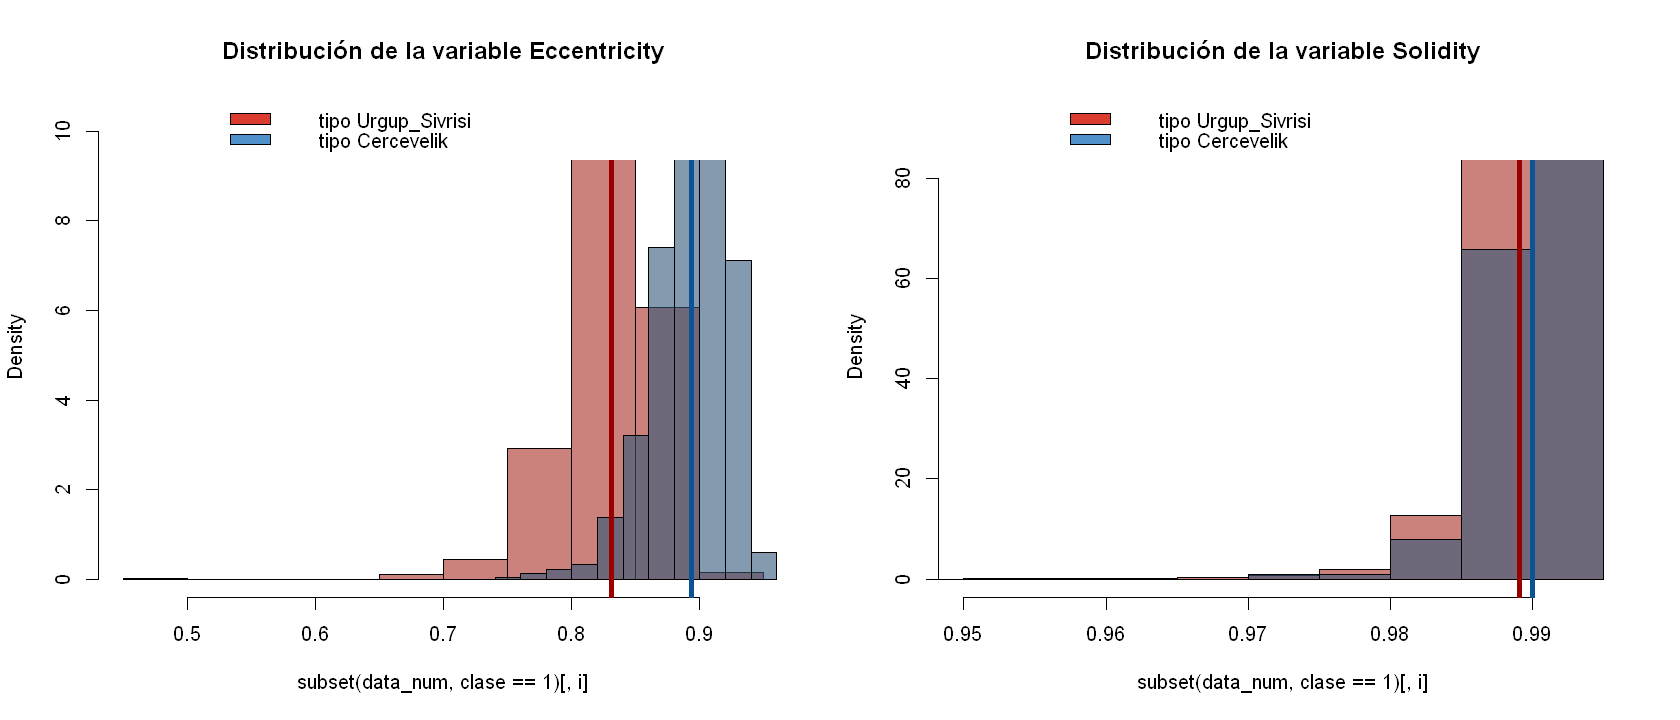

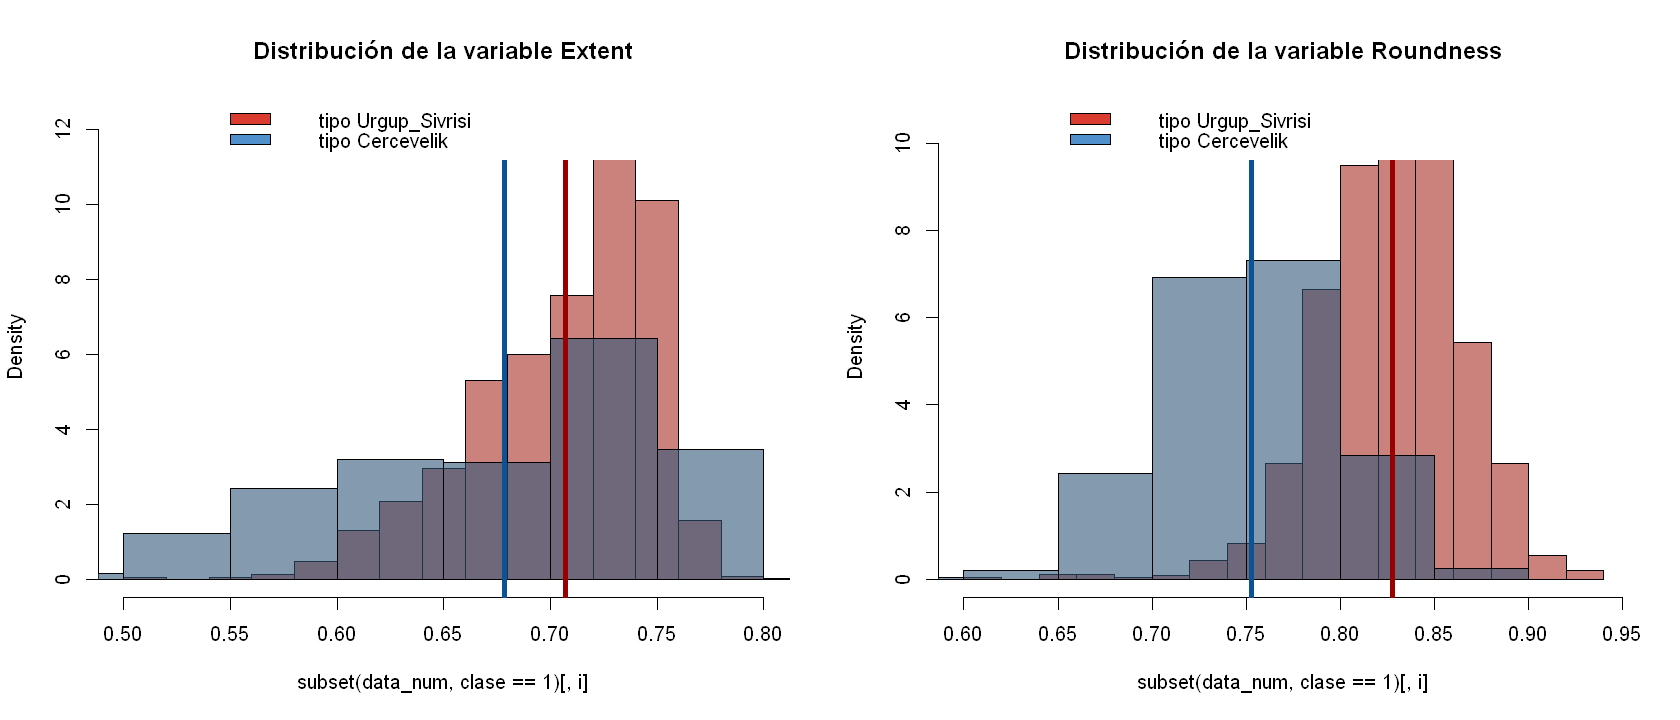

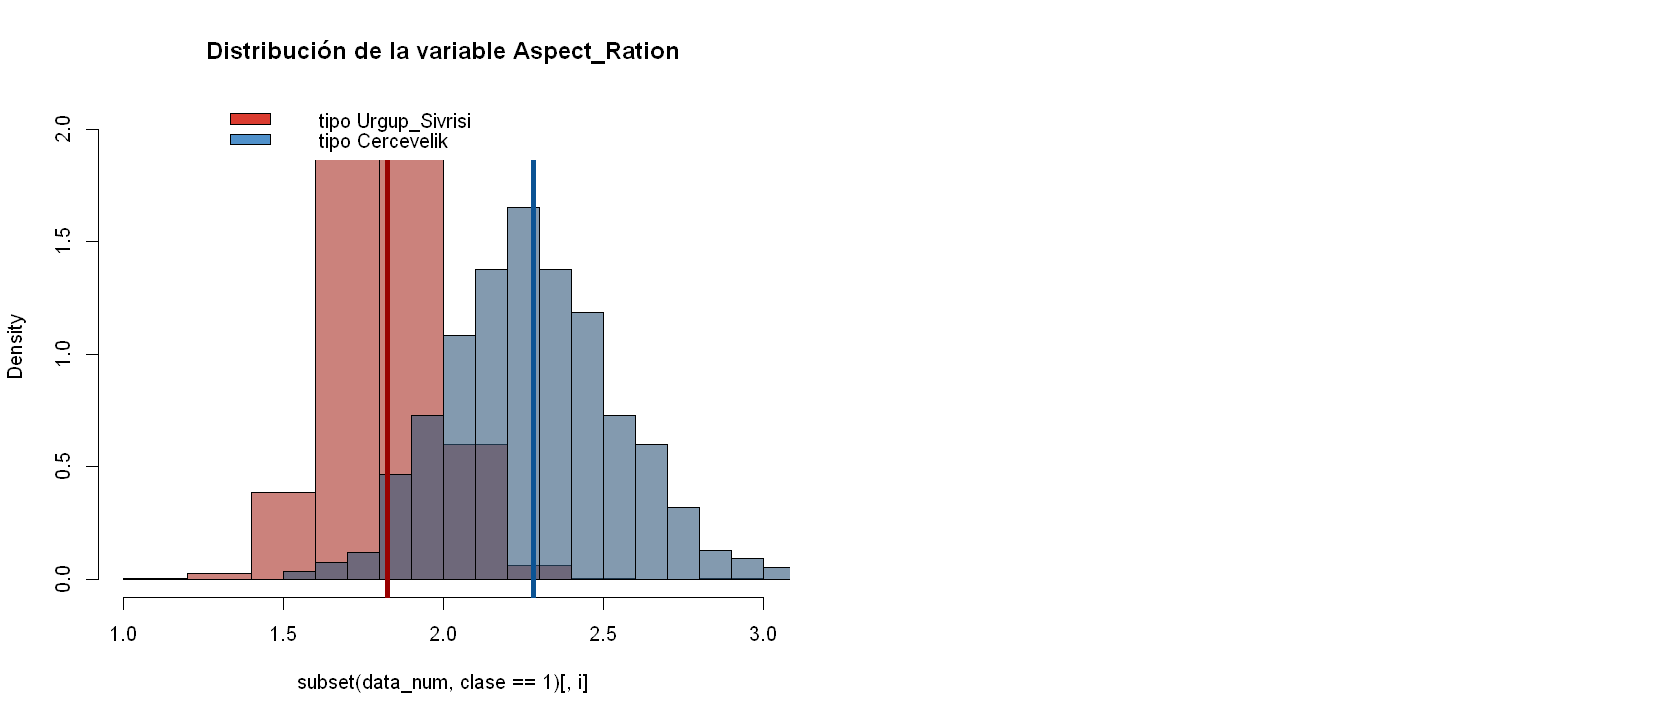

In [177]:
options(
  repr.plot.width = 14,
  repr.plot.height = 6
)

par(mfrow = c(1, 2))
for (i in 1:((length(colnames(data_num)))-2)) {

  hist(subset(data_num, clase == 1)[, i],
       col = rgb(0.66,0.18,0.14,0.6),
       main = paste0("Distribución de la variable ", colnames(data_num)[i]),
       freq = FALSE)
  hist(subset(data_num, clase == 0)[, i],
     col = rgb(0.187,0.339,0.474,0.6),
       add = TRUE,
       freq = FALSE)
  abline(v = mean(subset(data_num, clase == 1)[, i]), col = '#990000', lwd = 4)
  abline(v = mean(subset(data_num, clase == 0)[, i]), col = '#0b5394', lwd = 4)
  legend(x = "topright", legend = c('tipo Urgup_Sivrisi', 'tipo Cercevelik'), fill = c('#db3c30', '#5091cb'), box.lty = "blank")
  if (i %% 2 == 0) {par(mfrow = c(1, 2))}}

Observamos en algunos gráficos que hay superposición pero haremos un analisis de información mutua para ordenar la información y disminuir el ruido de mi variable objetivo.

# <font color='#3d59c6'>  3. SELECCIÓN DE VARIABLES </font>

Se realizará un análisis de Correlaciones donde se observarán sobre todo las variables que tienen relación con la variable target, es decir, la que pretende predecir el modelo. Seguidamente se hará un Análisis de Componentes Principales con la intención de reducir la dimensionalidad de las variables en nuevas variables que sean independientes entre ellas (pues no interesa que haya colinealidad) y ver las variables que sean realmente importantes para explicar la variable target. Después se aplicarán diversos algoritmos que permitirán cuantificar la información mutua y así ver la relevancia de las variables y finalmente, habiendo elegido las variables más adecuadas mediante todos los procedimientos mencionados, se podrá realizar un modelo de regresión logística. El objetivo de este análisis es realizar una predicción sobre si la calabaza es del tipo Urgup_Sivrisi (0) o del tipo Cercevelik (1).

### <font color='#3d59c6'>  3.2 REALIZACIÓN IGA </font>

Con tal de ver la información mutua entre el target y las covariables se aplican los tres algoritmos detallados a continuación:

- "infogain": ${H(Class)} + H(Attribute) − H(Class, Attribute)$

- "gainratio" : $H(Class) + H(Attribute) − H(Class, Attribute) / H(Attribute) $

- "symuncert" : $2 * (H(Class) + H(Attribute) − H(Class, Attribute)) / (H(Attribute) + H(Class)) $

Warning message in .information_gain.data.frame(x = x, y = y, type = type, equal = equal, :
"Dependent variable is a numeric! It will be converted to factor with simple factor(y). We do not discretize dependent variable in FSelectorRcpp by default! You can choose equal frequency binning discretization by setting equal argument to TRUE."


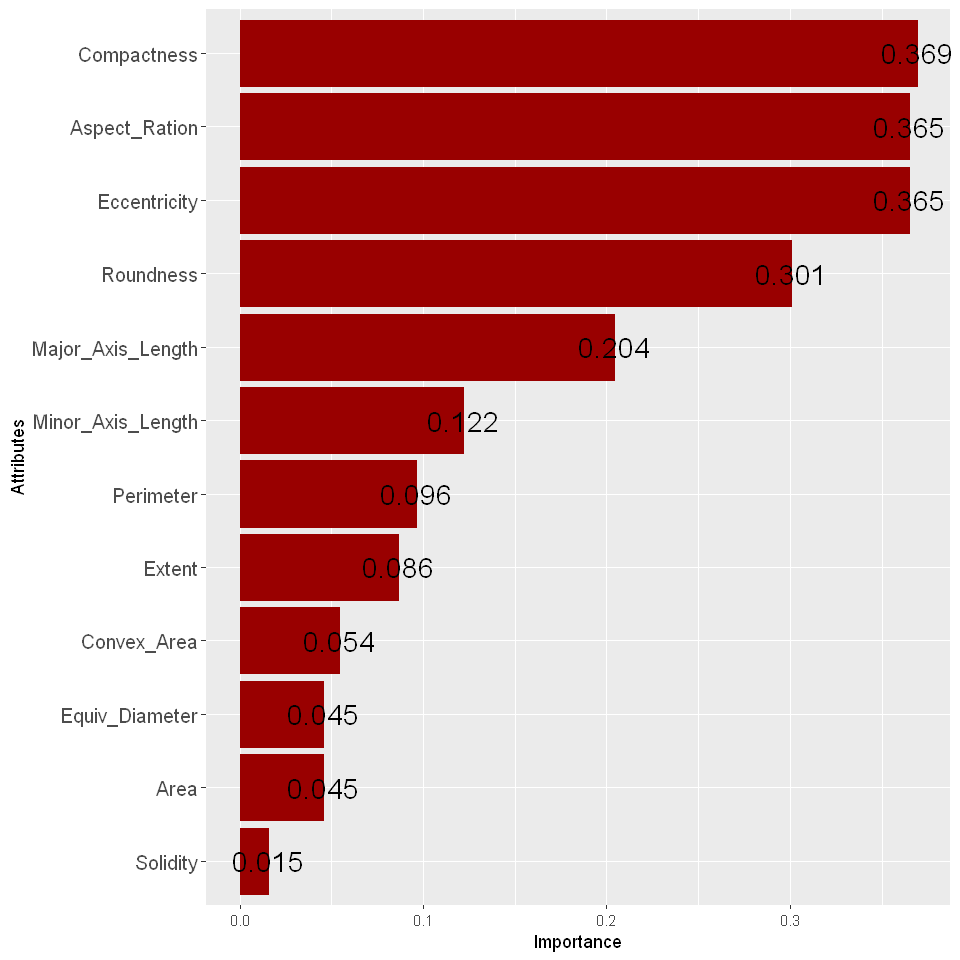

In [178]:
options(repr.plot.width = 8, repr.plot.height = 8 )
ig = information_gain(formula = clase ~ .
                     , data = data_num
                     , type = 'infogain')

ggplot(ig, aes(x = reorder(attributes, +importance), y = importance)) +
 geom_bar(stat = "identity", fill = "#990000", color = "#990000") +
geom_text(aes(label =  round(importance, 3)),  color = "black",size = 6) +  # Agregar etiquetas de valores 
  coord_flip() +
  labs(x = "Attributes", y = "Importance")+
  theme(
    axis.text.y = element_text(size = 12))

Warning message in .information_gain.data.frame(x = x, y = y, type = type, equal = equal, :
"Dependent variable is a numeric! It will be converted to factor with simple factor(y). We do not discretize dependent variable in FSelectorRcpp by default! You can choose equal frequency binning discretization by setting equal argument to TRUE."


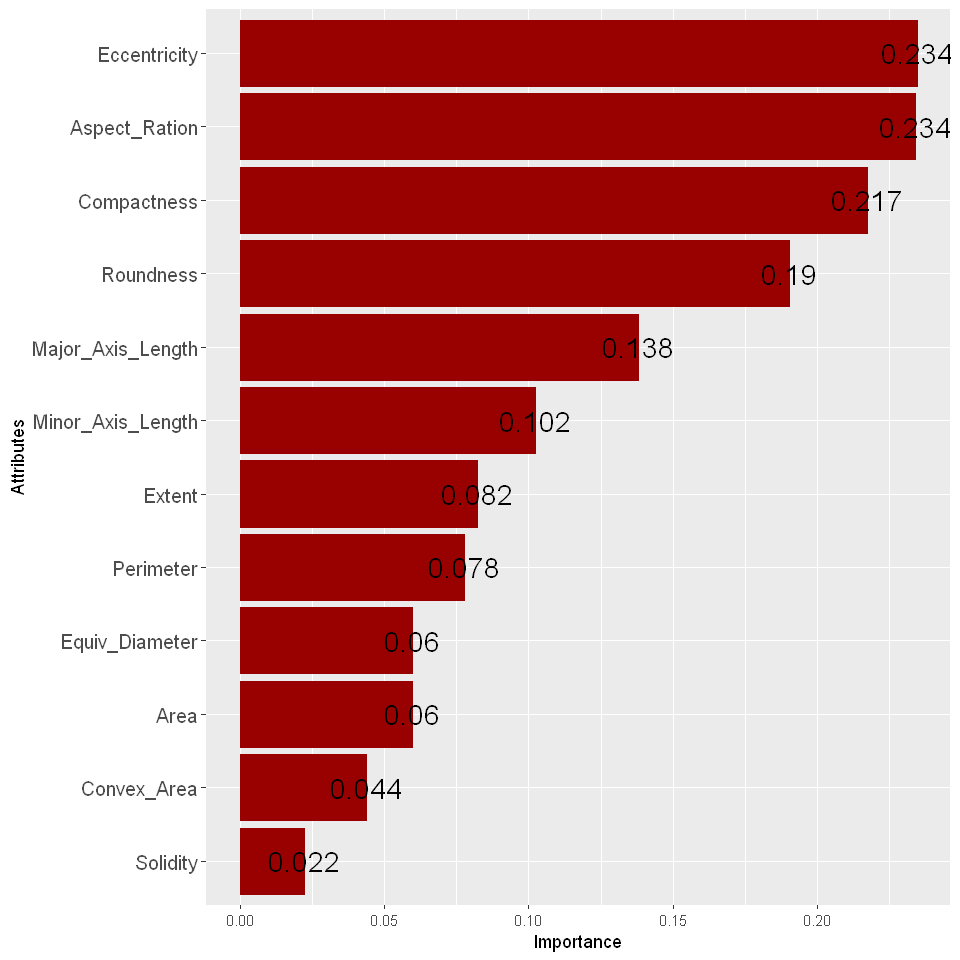

In [179]:
gr = information_gain(formula = clase ~ .
                     , data = data_num
                     , type = 'gainratio')

ggplot(gr, aes(x = reorder(attributes, +importance), y = importance)) +
 geom_bar(stat = "identity", fill = "#990000", color = "#990000") +
geom_text(aes(label =  round(importance, 3)),  color = "black",size = 6) +  # Agregar etiquetas de valores 
  coord_flip() +
  labs(x = "Attributes", y = "Importance")+
  theme(
    axis.text.y = element_text(size = 12))

Warning message in .information_gain.data.frame(x = x, y = y, type = type, equal = equal, :
"Dependent variable is a numeric! It will be converted to factor with simple factor(y). We do not discretize dependent variable in FSelectorRcpp by default! You can choose equal frequency binning discretization by setting equal argument to TRUE."


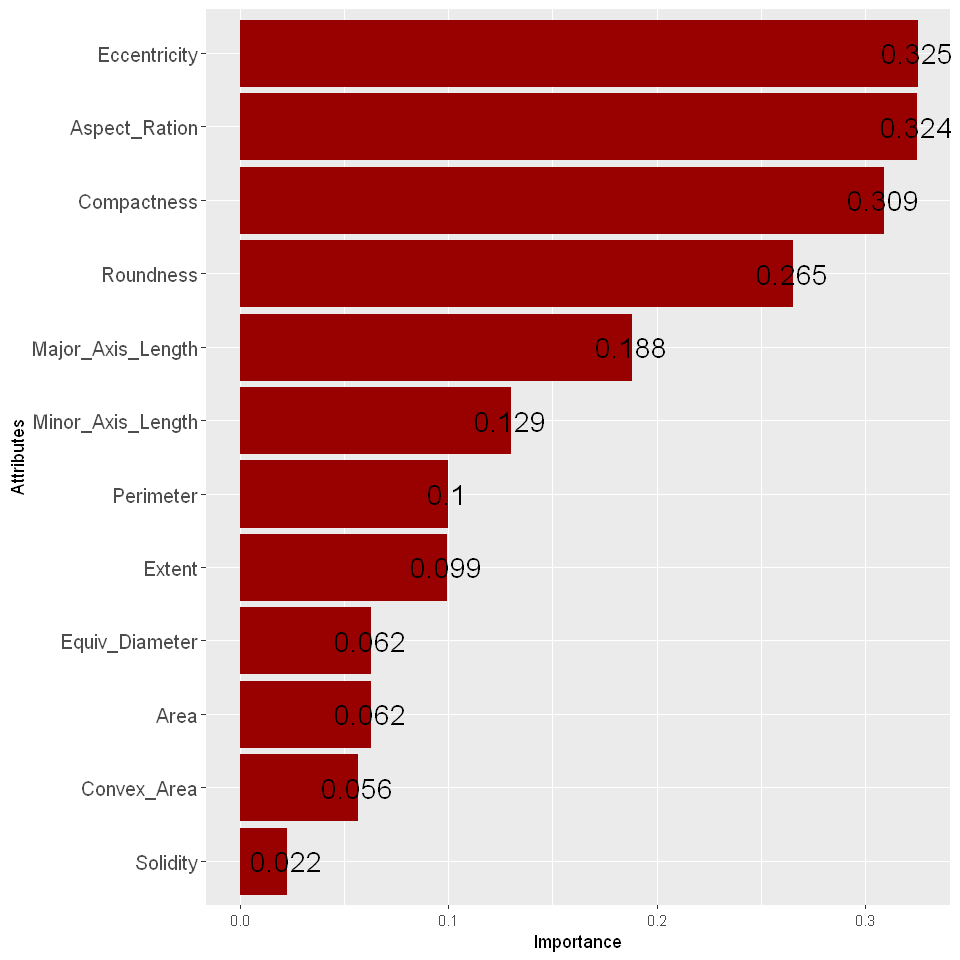

In [180]:
gr = information_gain(formula = clase ~ .
                     , data = data_num
                     , type = 'symuncert')

ggplot(gr, aes(x = reorder(attributes, +importance), y = importance)) +
 geom_bar(stat = "identity", fill = "#990000", color = "#990000") +
geom_text(aes(label =  round(importance, 3)),  color = "black",size = 6) +  # Agregar etiquetas de valores 
  coord_flip() +
  labs(x = "Attributes", y = "Importance")+
  theme(
    axis.text.y = element_text(size = 12))

En el gráfico anterior podemos ver que las variables que más me sirven, es decir que más me aportan información para el modelo, y que se repiten en los tres algoritmos son:

 - Aspect_Ration 
 - Eccentricity
 - Compactness

### <font color='#3d59c6'>  3.2 ANÁLISIS CORRELACIONES </font>

In [181]:
round(cor(data_num),2)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,clase
Area,1.00,0.93,0.79,0.69,1.00,1.00,0.16,0.16,-0.01,-0.15,0.16,-0.16,-0.17
Perimeter,0.93,1.00,0.95,0.39,0.93,0.93,0.46,0.07,-0.14,-0.50,0.49,-0.48,-0.39
Major_Axis_Length,0.79,0.95,1.00,0.10,0.79,0.79,0.70,0.12,-0.21,-0.68,0.73,-0.73,-0.56
Minor_Axis_Length,0.69,0.39,0.10,1.00,0.69,0.69,-0.59,0.09,0.23,0.56,-0.60,0.60,0.40
Convex_Area,1.00,0.93,0.79,0.69,1.00,1.00,0.16,0.14,-0.02,-0.15,0.16,-0.16,-0.17
Equiv_Diameter,1.00,0.93,0.79,0.69,1.00,1.00,0.16,0.16,-0.01,-0.15,0.16,-0.16,-0.16
Eccentricity,0.16,0.46,0.70,-0.59,0.16,0.16,1.00,0.04,-0.33,-0.89,0.95,-0.98,-0.70
Solidity,0.16,0.07,0.12,0.09,0.14,0.16,0.04,1.00,0.07,0.20,0.03,-0.02,-0.12
Extent,-0.01,-0.14,-0.21,0.23,-0.02,-0.01,-0.33,0.07,1.00,0.35,-0.33,0.34,0.24
Roundness,-0.15,-0.50,-0.68,0.56,-0.15,-0.15,-0.89,0.20,0.35,1.00,-0.94,0.93,0.67


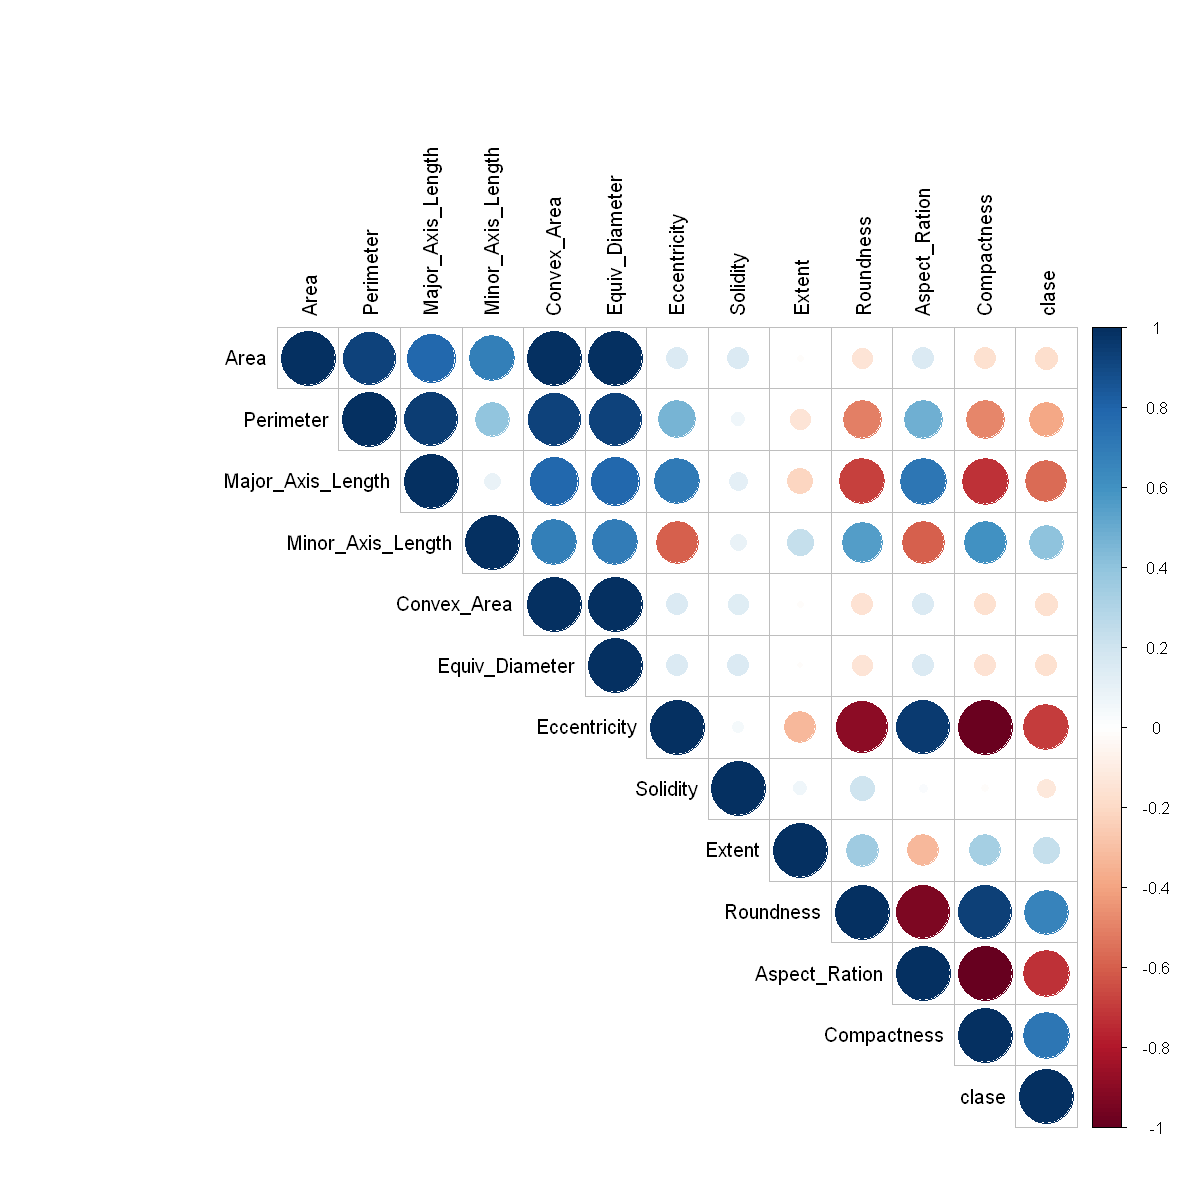

In [182]:
options(repr.plot.width = 10,  
  repr.plot.height = 10 )
corrplot::corrplot(cor(data_num)
                   , type = "upper"
                   , number.cex = .6
                   , tl.col = "black"
                   , tl.srt = 90)

# <font color='#3d59c6'>  3.3 ANÁLISIS PCA </font>

In [183]:
data_num_nt = data_num %>%
  select(-clase)

In [184]:
PCA = princomp(data_num_nt, scores = T)
summary(PCA)

Importance of components:
                             Comp.1       Comp.2       Comp.3       Comp.4
Standard deviation     1.939060e+04 1.912091e+02 5.447831e+01 8.387530e+00
Proportion of Variance 9.998947e-01 9.722749e-05 7.892581e-06 1.870854e-07
Cumulative Proportion  9.998947e-01 9.999919e-01 9.999998e-01 1.000000e+00
                             Comp.5       Comp.6       Comp.7       Comp.8
Standard deviation     2.416833e+00 8.726306e-01 5.691990e-02 2.877425e-02
Proportion of Variance 1.553334e-08 2.025036e-09 8.615886e-12 2.201810e-12
Cumulative Proportion  1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00
                             Comp.9      Comp.10      Comp.11      Comp.12
Standard deviation     6.500863e-03 3.202230e-03 1.043500e-03 5.039000e-04
Proportion of Variance 1.123864e-13 2.726948e-14 2.895723e-15 6.752436e-16
Cumulative Proportion  1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00

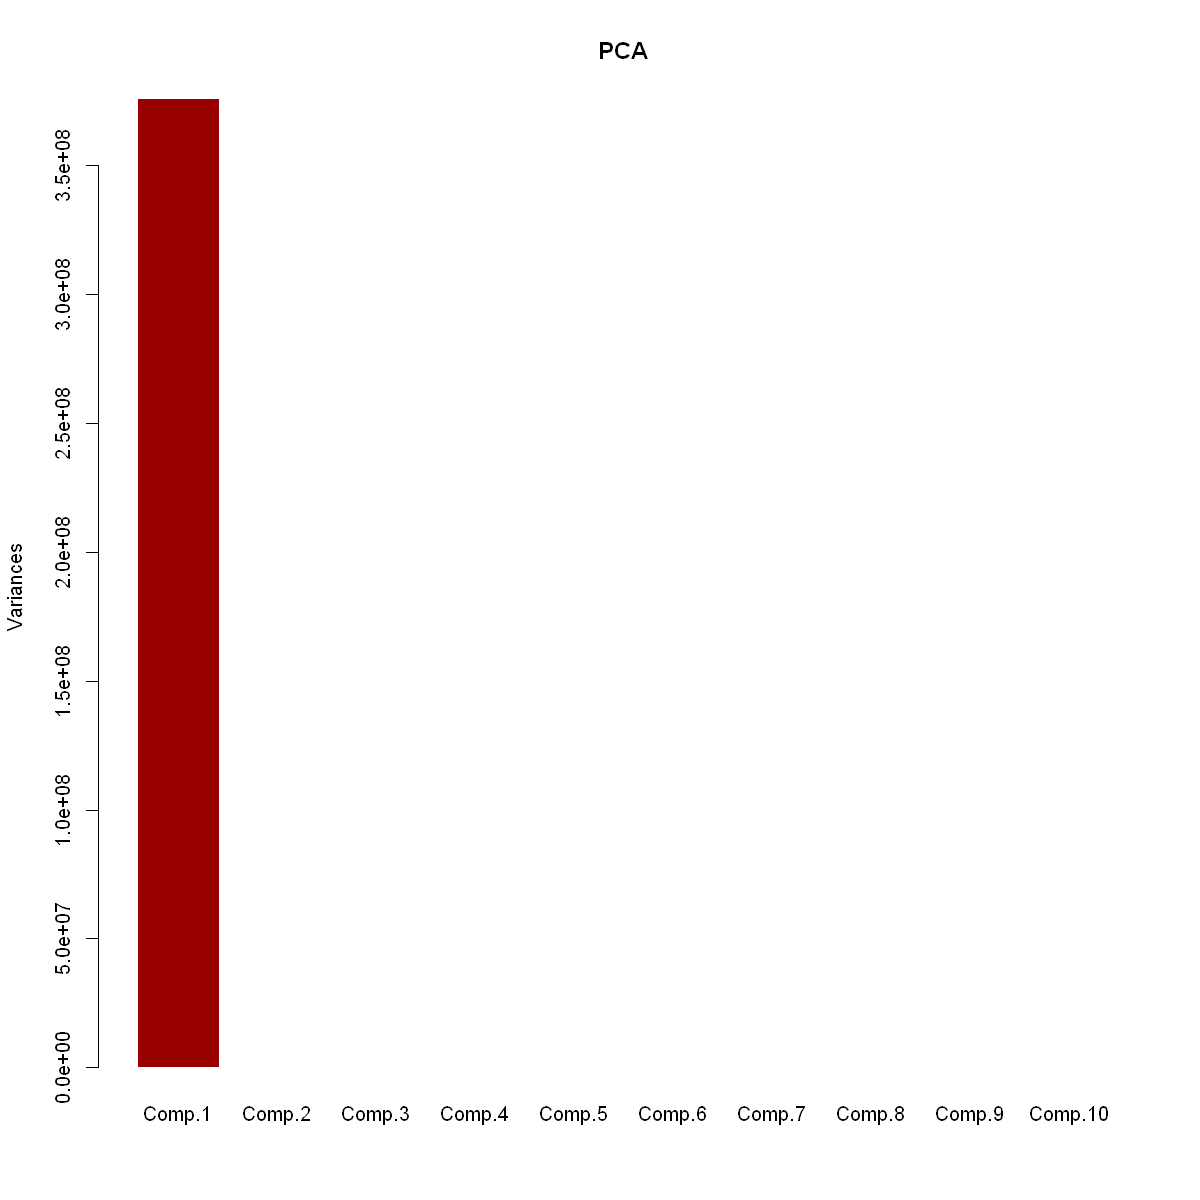

In [185]:
plot(PCA,type="bar",col="#990000", border = FALSE)

In [186]:
print(round(PCA$loadings[, 1:6],3))

                  Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6
Area               0.705  0.709  0.018  0.019  0.004  0.001
Perimeter          0.005 -0.043  0.717  0.688  0.101 -0.010
Major_Axis_Length  0.002  0.000  0.627 -0.581 -0.468  0.223
Minor_Axis_Length  0.001 -0.001 -0.302  0.429 -0.729  0.439
Convex_Area        0.710 -0.704 -0.025 -0.023 -0.001 -0.001
Equiv_Diameter     0.001  0.001  0.000  0.059 -0.489 -0.870
Eccentricity       0.000  0.000  0.001 -0.001  0.002 -0.010
Solidity           0.000  0.000  0.000  0.000  0.000  0.000
Extent             0.000  0.000  0.000  0.000 -0.002  0.001
Roundness          0.000  0.000 -0.001 -0.001 -0.003 -0.001
Aspect_Ration      0.000  0.000  0.006 -0.006 -0.001  0.018
Compactness        0.000  0.000 -0.001  0.001 -0.001  0.003


## <font color='#3d59c6'>  4. MODELO REGRESIÓN LOGÍSTICA </font>

- $H_{0}$: No existen diferencias significativas entre las medias de los grupos
- $H_{1}$: Existen diferencian significativas entre las medias de los grupos

Después de haber realizado un análisis de **correlaciones** para ver las posibles relaciones lineales entre variables se ha descartado una relación lineal entre la variable target y las covariables. No obstante, se han visto algunas correlaciones altas entre las covariables. Las variables más destacadas del estudio de correlación han sido las siguientes: 

- Area
- Perimeter 
- Convex_Area
- Major_Axis_Length
- Equiv_Diameter
- Aspect_Ration 
- Eccentricity
- Roundness

En el **análisis de componentes principales** se ha tenido en cuenta el primer PC explicando el 99.9% de la varianza donde destacan Convex_Area y Area, pero para el modelo las descartamos por estar altamente correlacionadas ya que nos duplican la información.

Mediante el primero, segundo y tercer algoritmo se han visto relevantes las siguientes variables:

- Aspect_Ration
- Eccentricity
- Compactness

Teniendo en cuenta los tres algoritmos, los análisis de correlaciones y de componentes principales se eligen como variables para configurar un primer modelo las siguientes:

- Major_Axis_Length
- Aspect_Ration 
- Eccentricity
- Compactness


In [187]:
data_num_subset = subset(data_num, select = c(clase, Area, Convex_Area, Major_Axis_Length, Aspect_Ration, Eccentricity, Compactness))

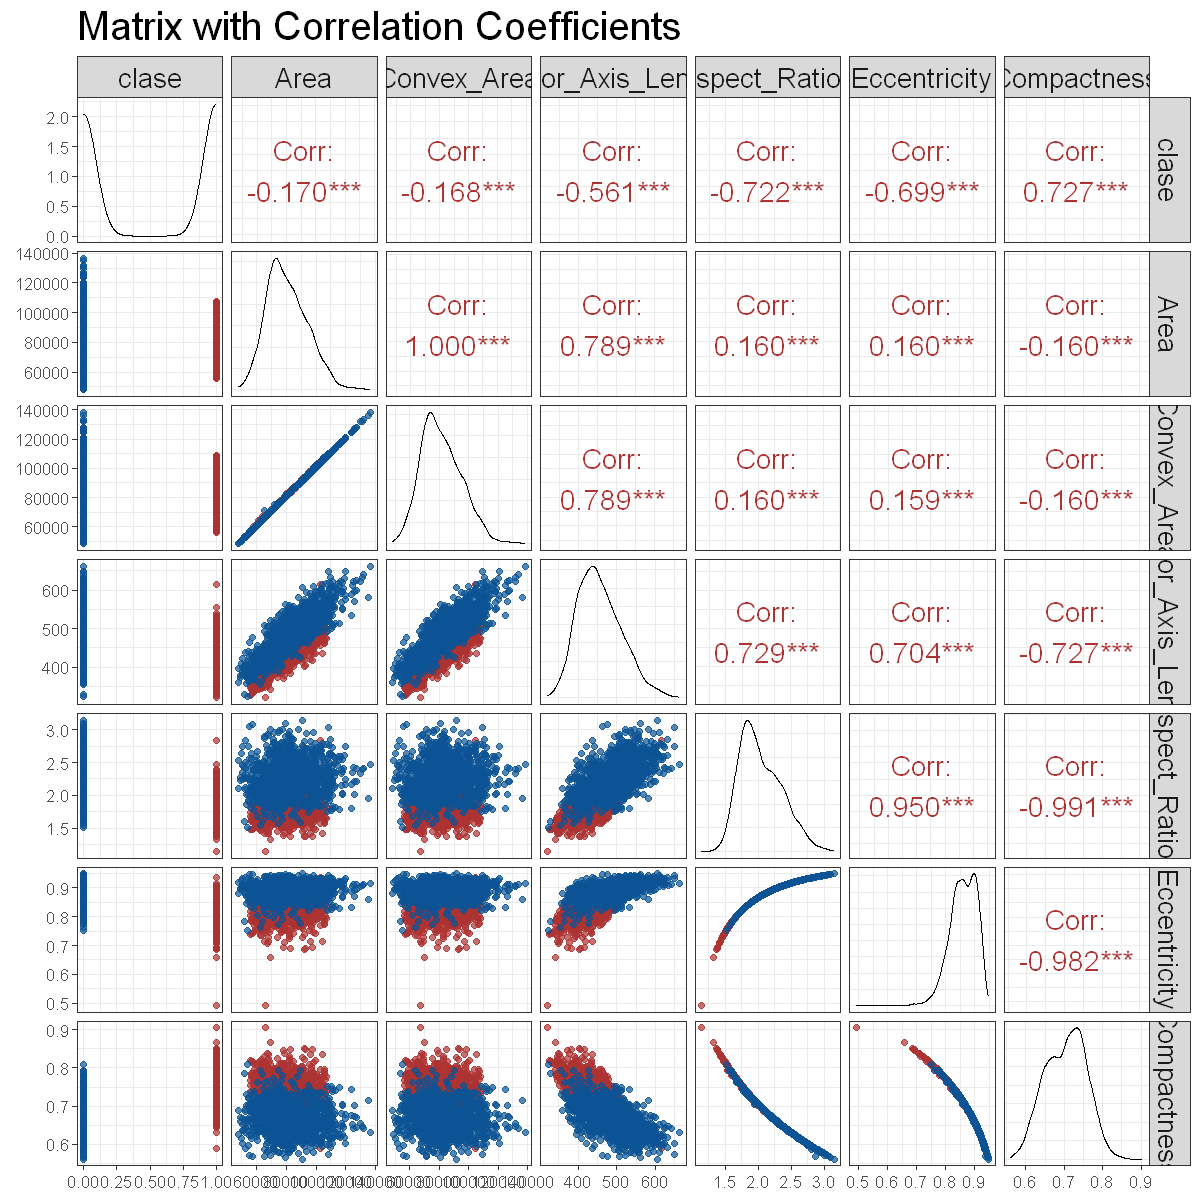

In [188]:
options(repr.plot.width = 10,  repr.plot.height = 10  )

cal_1_s = sum(data_num_subset$clase == 1)
cal_0_s = sum(data_num_subset$clase == 0)
colores = c(rep('#ad3232',cal_1_s), rep('#0b5394',cal_0_s))

ggpairs(
  data_num_subset,
  title = "Matrix with Correlation Coefficients",
  lower = list(continuous = wrap("points", alpha = 0.7, color = colores)),
  upper = list(continuous = wrap("cor", size = 6, color ='#ad3232'))) +
theme_bw() +
theme(
  text = element_text(size = 20), 
  axis.text = element_text(size = 10),
  axis.title = element_text(size = 10))

Correlacion Aspect_Ration-Compactness (me quedo Aspect_Ration por aportar + info) y Eccentricity-Major_Axis_Length (me quedo Eccentricity por aportar + info)

# <font color='#3d59c6'>  4.1 FASE TRAIN </font>

In [189]:
set.seed(5)
inTrain = createDataPartition(y = data_num$clase
                                  , p = .80
                                  , list = FALSE
                                  , times = 1)
data_num.train = data_num[inTrain,]
data_num.test = data_num[-inTrain,]

ytrain = data_num$clase[inTrain]
ytest = data_num$clase[-inTrain]

In [190]:
### Generamos un primer modelo unicamente con la variable Aspect_Ration
mrl0 = glm(formula = clase ~ Aspect_Ration
          , data = data_num.train
          , family = "binomial")
summary(mrl0)


Call:
glm(formula = clase ~ Aspect_Ration, family = "binomial", data = data_num.train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.1455  -0.3695   0.1084   0.4901   4.1010  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)    20.8919     0.9128   22.89   <2e-16 ***
Aspect_Ration -10.3135     0.4551  -22.66   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2769.7  on 1999  degrees of freedom
Residual deviance: 1292.0  on 1998  degrees of freedom
AIC: 1296

Number of Fisher Scoring iterations: 6


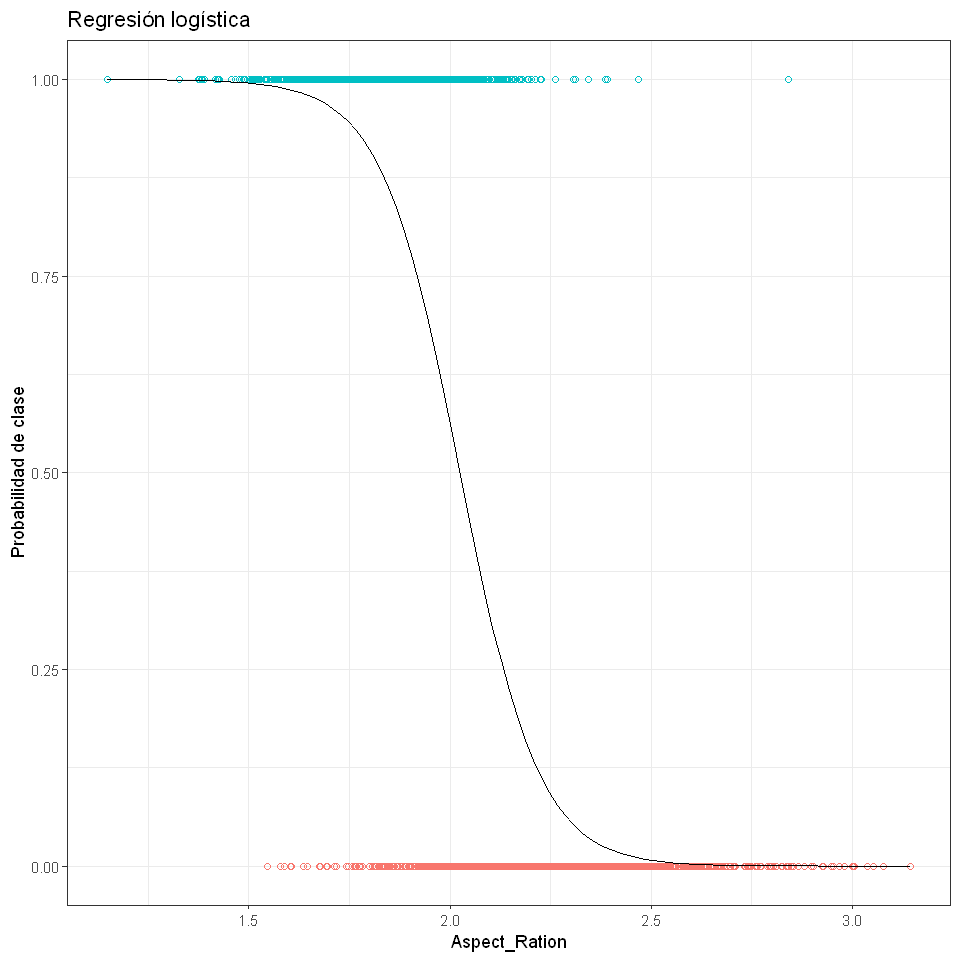

In [191]:
# Representación gráfica del modelo.
options(repr.plot.width = 8,  repr.plot.height = 8  )
ggplot(data = data_num.train, aes(x = Aspect_Ration, y = clase)) +
  geom_point(aes(color = as.factor(clase)), shape = 1) + 
  stat_function(fun = function(x){predict(mrl0,
                                          newdata = data.frame(Aspect_Ration = x),
                                          type = "response")}) +
  theme_bw() +
  labs(title = "Regresión logística",
       y = "Probabilidad de clase") +
  theme(legend.position = "none")

In [192]:
### Generamos un primer modelo con las variables consideradas importantes por los diferentes análisis
mrl1 = glm(formula = clase ~ Major_Axis_Length + Aspect_Ration + Eccentricity + Compactness
          , data = data_num.train
          , family = "binomial")
summary(mrl1)


Call:
glm(formula = clase ~ Major_Axis_Length + Aspect_Ration + Eccentricity + 
    Compactness, family = "binomial", data = data_num.train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.9555  -0.3371   0.1522   0.4772   4.3850  

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)       -71.095909  47.193466  -1.506 0.131945    
Major_Axis_Length  -0.007109   0.001983  -3.585 0.000337 ***
Aspect_Ration      -5.880303   5.384241  -1.092 0.274775    
Eccentricity       49.157217  12.941554   3.798 0.000146 ***
Compactness        62.113785  38.741164   1.603 0.108868    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2769.7  on 1999  degrees of freedom
Residual deviance: 1270.4  on 1995  degrees of freedom
AIC: 1280.4

Number of Fisher Scoring iterations: 10


Se puede ver como las variables Aspect_Ration y Compactness no resultan significativas (por su p-value superior a 0.05) y se decide realizar un segundo modelo excluyéndolas.

In [193]:
### Generamos un primer modelo con las variables consideradas importantes por los diferentes análisis
mrl2 = glm(formula = clase ~ Major_Axis_Length + Eccentricity
          , data = data_num.train
          , family = binomial)
summary(mrl2)


Call:
glm(formula = clase ~ Major_Axis_Length + Eccentricity, family = binomial, 
    data = data_num.train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.8451  -0.4234   0.0338   0.4700   3.3730  

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)        58.659131   2.672725  21.947  < 2e-16 ***
Major_Axis_Length  -0.008067   0.001900  -4.246 2.18e-05 ***
Eccentricity      -63.444385   3.360259 -18.881  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2769.7  on 1999  degrees of freedom
Residual deviance: 1319.4  on 1997  degrees of freedom
AIC: 1325.4

Number of Fisher Scoring iterations: 6


In [194]:
### Generamos las predicciones de nuestro modelo
mrl2_prob = predict(mrl2, type = 'response')
head(mrl2_prob)

1         3         4         5         6         7 
0.9999021 0.4099298 0.9827942 0.9739250 0.9632383 0.9941338

In [195]:
### Vemos la predicción para cada instancia
mrl2_pred = ifelse(mrl2_prob > 0.5, 1, 0)
head(mrl2_pred)

1 3 4 5 6 7 
1 0 1 1 1 1

In [196]:
confusionMatrix(as.factor(mrl2_pred), as.factor(data_num.train$clase))

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 822 129
         1 140 909
                                          
               Accuracy : 0.8655          
                 95% CI : (0.8498, 0.8802)
    No Information Rate : 0.519           
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.7305          
                                          
 Mcnemar's Test P-Value : 0.5421          
                                          
            Sensitivity : 0.8545          
            Specificity : 0.8757          
         Pos Pred Value : 0.8644          
         Neg Pred Value : 0.8665          
             Prevalence : 0.4810          
         Detection Rate : 0.4110          
   Detection Prevalence : 0.4755          
      Balanced Accuracy : 0.8651          
                                          
       'Positive' Class : 0               
                              

### <font color='#3d59c6'>  4.2 FASE TEST </font>

In [197]:
pred_mrl2= predict(mrl2,newdata = data_num.test, type="response")
mrl2_pred = ifelse(pred_mrl2 > 0.5, 1, 0)
confusionMatrix(as.factor(mrl2_pred), as.factor(data_num.test$clase))

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 202  36
         1  36 226
                                          
               Accuracy : 0.856           
                 95% CI : (0.8221, 0.8856)
    No Information Rate : 0.524           
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.7113          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.8487          
            Specificity : 0.8626          
         Pos Pred Value : 0.8487          
         Neg Pred Value : 0.8626          
             Prevalence : 0.4760          
         Detection Rate : 0.4040          
   Detection Prevalence : 0.4760          
      Balanced Accuracy : 0.8557          
                                          
       'Positive' Class : 0               
                              

El dataset se componía de un total de 2500 registros y 14 variables.

Para la realización de un modelo de regresión logística que nos permita realizar una predicción sobre si la calabaza es del tipo Urgup_Sivrisi (0) o del tipo Cercevelik (1) a partir de ciertas variables se han utilizado varias técnicas para la detección de las variables que más información pueden aportar al modelo:

- Análisis Correlaciones: Area; Perimeter; Convex_Area
- Realización IGA - Information Gain Algorithms: Aspect_Ration; Eccentricity; Compactness
- Análisis PCA: Area; Perimeter

Finalmente se construye el modelo con: **Major_Axis_Length, Aspect_Ration, Eccentricity y Compactness**

En la fase de Test se obtiene:

- Accuracy del 85%
- Sensibilidad (verdaderos positivos):84% 
- Especificidad (verdaderos negativos):86%

y en la matriz de confusión:

- El modelo predijo correctamente 226 instancias como Cercevelik cuando la clase real también era Cercevelik.
- El modelo predijo correctamente 202 instancias como Urgup_Sivrisi cuando la clase real también era Urgup_Sivrisi.
- El modelo predijo incorrectamente 36 instancias como Cercevelik cuando la clase real era Urgup_Sivrisi.
- El modelo predijo incorrectamente 36 instancias como Urgup_Sivrisi cuando la clase real era Cercevelik. 
